Problem Statement:

A gambler has the opportunity to make bets on the outcomes of a sequence of coin flips. 
If the flip is heads, then she wins as many dollars as she has bet on that flip; if it is tails, she loses all the bet. The game ends when the gambler reaches her goal of making $100, or when she runs out of money. At each time, the gambler chooses how much of her money to bet on the next flip.

This situation can be formulated as an undiscounted, episodic,  finite MDP. The state is the gambler’s capital, s ∈ {1, 2, . . . , 99,100},
and her actions are stakes (i.e., how much to bet), a ∈ {0, 1, . . . , min(s, 100 − s)}. 
The rewards are zero for all state transitions, except when the transition leads to the gambler reaching her $100 goal, in which case the reward is +1. Let ph be the probability that the coin flips heads.




In [21]:
import numpy as np
import sys
import matplotlib.pyplot as plt


Write a code that uses Value Iteration to  nd the gambler's optimal policy (i.e, a mapping from levels of capital to the stakes). In particular, plot the optimal policy for ph = 0:25 and ph = 0:55.

In [22]:
def value_iteration(ph, theta=0.0001, discount_factor=1.0):

    rewards = np.zeros(101)
    rewards[100] = 1 
    
    V = np.zeros(101)
    
    def one_step_lookahead(s, V, rewards):

        A = np.zeros(101)
        stakes = range(1, min(s, 100-s)+1) 
        for a in stakes:
            A[a] = ph * (rewards[s+a] + V[s+a]*discount_factor) + (1-ph) * (rewards[s-a] + V[s-a]*discount_factor)
        return A
    
    while True:

        delta = 0

        for s in range(1, 100):
            A = one_step_lookahead(s, V, rewards)
            best_action_value = np.max(A)
            delta = max(delta, np.abs(best_action_value - V[s]))
            V[s] = best_action_value        

        if delta < theta:
            break
    

    policy = np.zeros(100)
    for s in range(1, 100):
        A = one_step_lookahead(s, V, rewards)
        best_action = np.argmax(A)
        policy[s] = best_action
    
    return policy, V

In [23]:
policy_25, v_25 = value_iteration(0.25)
policy_55, v_55 = value_iteration(0.55)

print("Optimized Policy: for ph = 0.25")
print(policy_25)


print("Optimized Value Function: for ph = 0.25")
print(v_25)

print("Optimized Policy: for ph = 0.55")
print(policy_55)


print("Optimized Value Function: for ph = 0.55")
print(v_55)


Optimized Policy: for ph = 0.25
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11. 15. 16. 17.
 18.  6. 20. 21.  3. 23. 24. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.
 11. 12. 38. 11. 10.  9. 42.  7. 44.  5. 46. 47. 48. 49. 50.  1.  2.  3.
  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 11. 10.  9. 17.  7. 19.  5. 21.
 22. 23. 24. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11.
 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]
Optimized Value Function: for ph = 0.25
[0.00000000e+00 7.24792480e-05 2.89916992e-04 6.95257448e-04
 1.16010383e-03 1.76906586e-03 2.78102979e-03 4.03504074e-03
 4.66214120e-03 5.59997559e-03 7.08471239e-03 9.03964043e-03
 1.11241192e-02 1.56793594e-02 1.61464431e-02 1.69517994e-02
 1.86512806e-02 1.98249817e-02 2.24047303e-02 2.73845196e-02
 2.83388495e-02 3.04937363e-02 3.61633897e-02 3.84953022e-02
 4.44964767e-02 6.25000000e-02 6.27174377e-02 6.33700779e-02
 6.45857723e-02 6.59966059e-02 6.78135343e-02 7.08430894e-02
 7.46098323e-02 7.64884604e-02 7.

Plots of Value function vs Capital for ph =0.25 and ph=0.55

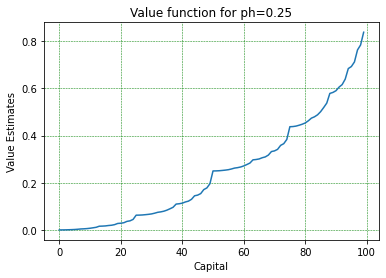

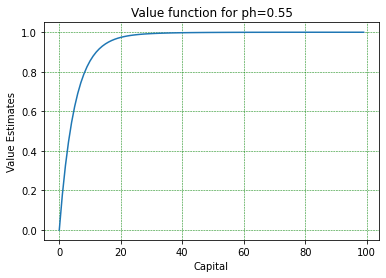

In [24]:

capital = range(100)

value_fucntion = v_25[:100]
 

plt.figure("Value iteration 0.25")
plt.plot(capital, value_fucntion)
plt.xlabel('Capital')
plt.ylabel('Value Estimates')
plt.title('Value function for ph=0.25')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

value_fucntion_55 = v_55[:100]
 

plt.figure("Value iteration 0.55")
plt.plot(capital, value_fucntion_55)
plt.xlabel('Capital')
plt.ylabel('Value Estimates')
plt.title('Value function for ph=0.55')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

Plots of Capital vs Optimal Policy for ph=0.25 and ph=0.55

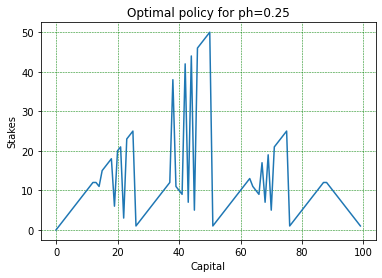

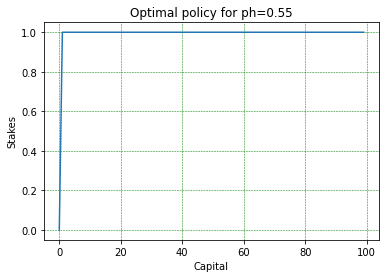

In [26]:


plt.figure("Optimal poilicy 0.25")
plt.plot(capital, policy_25)
plt.xlabel('Capital')
plt.ylabel('Stakes')
plt.title('Optimal policy for ph=0.25')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

plt.show()

plt.figure("Optimal poilicy 0.55")
plt.plot(capital, policy_55)
plt.xlabel('Capital')
plt.ylabel('Stakes')
plt.title('Optimal policy for ph=0.55')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

plt.show()